In [1]:
#Bank Customer Churn Prediction Using Decision Tress and Random Forest

In [2]:
#--Importing required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(context = 'paper', style ='whitegrid', font= 'Georgia', font_scale = 1.2)

In [3]:
#--Loading the dataset
df = pd.read_csv('E:/Downloads/DataSets/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#--Checking null values
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
#--Checking data types
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [9]:
#--Getting value counts for categorical values
for i in ['credit_card', 'active_member','products_number']:
    print(df[i].value_counts())

1    7055
0    2945
Name: credit_card, dtype: int64
1    5151
0    4849
Name: active_member, dtype: int64
1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64


In [10]:
#--Comverting them into object data type
for i in ['credit_card', 'active_member','products_number']:
        df[i] = df[i].astype('object')

In [11]:
#--Confiriming our final data types
df.dtypes

customer_id           int64
credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number      object
credit_card          object
active_member        object
estimated_salary    float64
churn                object
dtype: object

In [12]:
#--Dropping the redundant column
df.drop('customer_id', inplace = True,axis = 1)

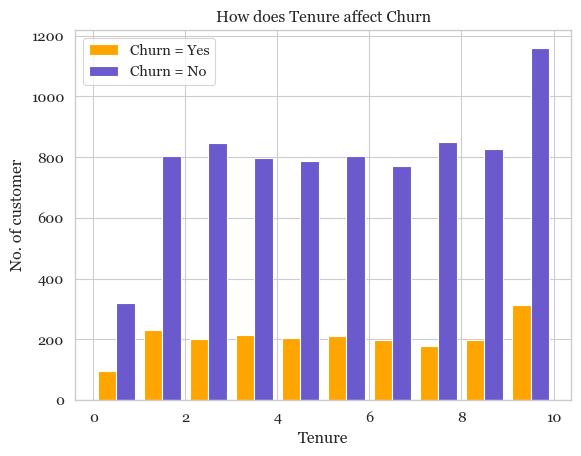

In [13]:
#--How does Tenure affect Churn
tenure_yes = df[df['churn'] == 1].tenure
tenure_no = df[df['churn'] == 0].tenure

plt.hist([tenure_yes,tenure_no], color =['orange','slateblue'], label=['Churn = Yes','Churn = No'])
plt.legend()
plt.title('How does Tenure affect Churn')
plt.xlabel('Tenure')
plt.ylabel('No. of customer')
plt.show()

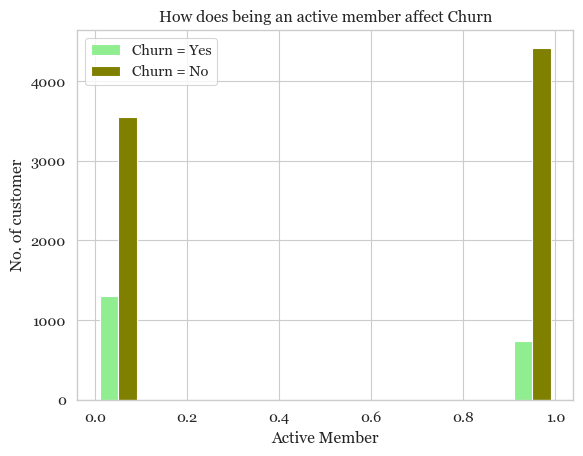

In [14]:
#--How does being an active member affect Churn
member_yes = df[df['churn'] == 1].active_member
member_no = df[df['churn'] == 0].active_member

plt.hist([member_yes,member_no], color =['lightgreen','olive'], label=['Churn = Yes','Churn = No'])
plt.legend()
plt.title('How does being an active member affect Churn')
plt.xlabel('Active Member')
plt.ylabel('No. of customer')
plt.show()

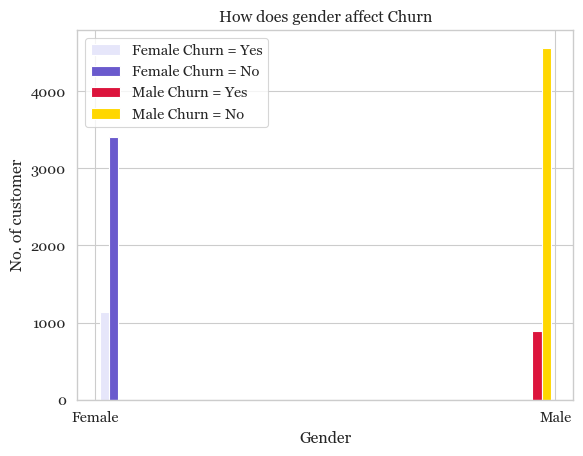

In [15]:
#--How does gender affect Churn

female = df[df['gender'] == 'Female']
male = df[df['gender'] == 'Male']
female_yes = female[female['churn'] == 1].gender
female_no = female[female['churn'] == 0].gender
male_yes = male[male['churn'] == 1].gender
male_no = male[male['churn'] == 0].gender



plt.hist([female_yes,female_no,male_yes,male_no], color =['lavender','slateblue','crimson','gold'], 
         label=['Female Churn = Yes','Female Churn = No','Male Churn = Yes','Male Churn = No'])
plt.legend()
plt.title('How does gender affect Churn')
plt.xlabel('Gender')
plt.ylabel('No. of customer')
plt.show()

In [16]:
#--Examining country column
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

In [17]:
#--One-Hot Encoding gender column
df['gender'] = pd.get_dummies(df['gender'],drop_first = True)

In [20]:
#--Label Encoding country column
from sklearn.preprocessing import LabelEncoder
coder = LabelEncoder()
df['country'] = pd.DataFrame(coder.fit_transform(df['country']))

In [21]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [22]:
#--Splitting the model
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(df.drop('churn', axis = 1), df['churn'], random_state = 0, test_size = .30)

In [30]:
#Y_train = Y_train.astype('int')
#y_test = y_test.astype('int')

In [32]:
#--Building a Decision Tree
from sklearn.tree import DecisionTreeClassifier as DTC
model = DTC().fit(X_train,Y_train)

In [34]:
#--Getting Predictions
y_pred = model.predict(x_test)

In [36]:
#--Evaluation our model
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

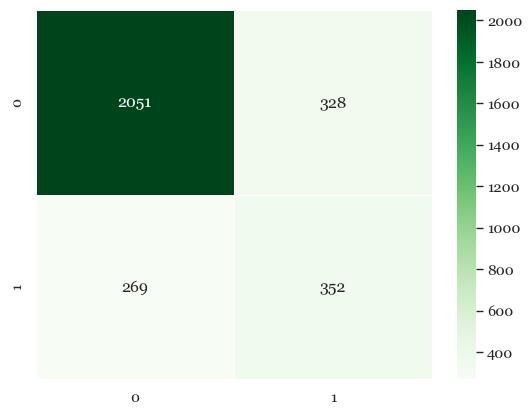

In [37]:
#--Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred), cmap = 'Greens', linewidth = 0.5, annot = True, fmt= 'd')

In [38]:
#--Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2379
           1       0.52      0.57      0.54       621

    accuracy                           0.80      3000
   macro avg       0.70      0.71      0.71      3000
weighted avg       0.81      0.80      0.80      3000



In [40]:
#--Building Random Forest
from sklearn.ensemble import RandomForestClassifier as RFC

In [41]:
#--For the right value of n_estimators
score = []
for estimators in range(1,10):
    model_rfc = RFC(n_estimators = estimators).fit(X_train,Y_train)
    score.append(model_rfc.score(x_test,y_test))

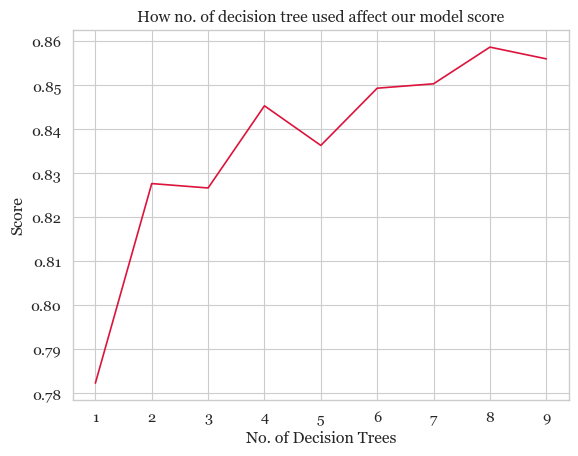

In [43]:
plt.plot(range(1,10), score, color = 'crimson')
plt.title('How no. of decision tree used affect our model score')
plt.xlabel('No. of Decision Trees')
plt.ylabel('Score')
plt.show()

In [44]:
#--Finally building it
model_rfc = RFC(n_estimators = 9).fit(X_train,Y_train)

In [45]:
#--Getting predictions
y_pred_rfc = model_rfc.predict(x_test)

<AxesSubplot:>

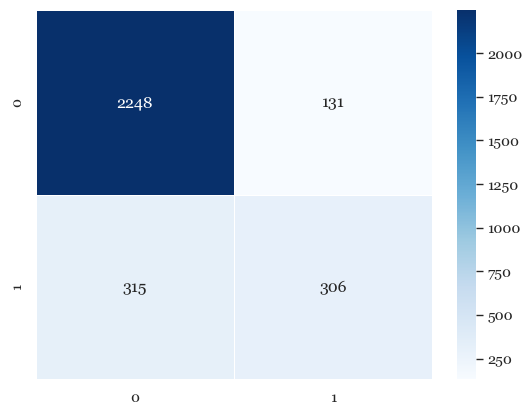

In [46]:
#--Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred_rfc), cmap = 'Blues', linewidth = 0.5, annot = True, fmt= 'd')

In [47]:
#--Classification Report
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2379
           1       0.70      0.49      0.58       621

    accuracy                           0.85      3000
   macro avg       0.79      0.72      0.74      3000
weighted avg       0.84      0.85      0.84      3000

